# Fire up libraries

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

# Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [2]:
sales = pd.read_csv('home_data.csv')

In [3]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
sales[sales['id']==1839920160]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11860,1839920160,20140714T000000,432000,3,2.0,1870,7080,1.0,0,0,...,7,1210,660,1969,0,98034,47.7244,-122.179,1620,8000


In [5]:
sales.keys() #get all the keys from the object

Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')

In [6]:
sales.shape

(21613, 21)

# Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

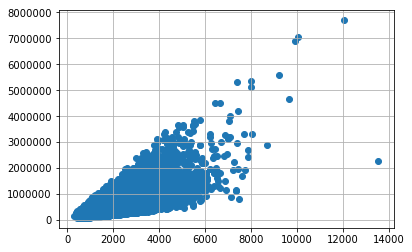

In [7]:
plt.grid('on')
plt.scatter(sales['sqft_living'], sales['price']) 
plt.show()

# Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use random_state=200 so that everyone running this notebook gets the same results.  In practice, you may set a random seed.  

In [8]:
train_data = sales.sample(frac=0.8, random_state=200)
test_data  = sales.drop(train_data.index)
print(train_data.shape, test_data.shape)

((17290, 21), (4323, 21))


In [9]:
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11860,1839920160,20140714T000000,432000,3,2.00,1870,7080,1.0,0,0,...,7,1210,660,1969,0,98034,47.7244,-122.179,1620,8000
12446,6705850140,20141009T000000,750000,4,2.75,3170,7634,2.0,0,0,...,10,3170,0,1992,0,98075,47.5774,-122.054,2940,7846
10556,924069190,20140819T000000,440000,3,1.75,2000,11880,2.0,0,0,...,8,2000,0,1979,0,98075,47.5882,-122.052,1820,15120
4828,3211270170,20140523T000000,404000,4,3.00,4060,35621,1.0,0,0,...,9,2030,2030,1989,0,98092,47.3059,-122.108,2950,35259
3502,9523103001,20141013T000000,389000,2,1.00,850,3276,1.0,0,0,...,6,850,0,1910,0,98103,47.6742,-122.350,1460,4100


In [10]:
test_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,20141209T000000,604000,4,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.0,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.5,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
17,6865200140,20140529T000000,485000,4,1.0,1600,4300,1.5,0,0,...,7,1600,0,1916,0,98103,47.6648,-122.343,1610,4300
18,16000397,20141205T000000,189000,2,1.0,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095


## Build the regression model using only sqft_living as a feature

In [11]:
x_train = train_data['sqft_living'].values.reshape(-1,1)
y_train = train_data['price'].values.reshape(-1,1)


In [12]:
simple_model = linear_model.LinearRegression()
simple_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

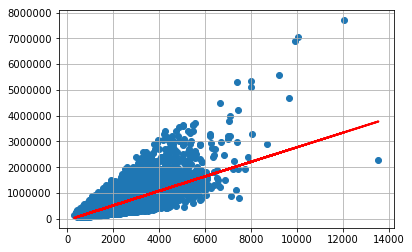

In [13]:
plt.grid('on')
plt.scatter(x_train, y_train)
plt.plot(x_train, simple_model.predict(x_train), color='red', linewidth=2)
plt.show()

# Let's show what our predictions look like

In [14]:
x_test = test_data['sqft_living'].values.reshape(-1,1)
y_test = test_data['price'].values.reshape(-1,1)

y_pred = simple_model.predict(x_test)

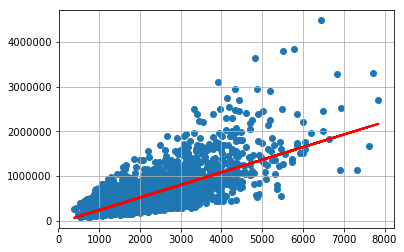

In [15]:
plt.grid('on')
plt.scatter(x_test, y_test)
plt.plot(x_test,y_pred, color='red', linewidth=2)
plt.show()

# Evaluate the simple model

In [16]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [17]:
print('intercept:', simple_model.intercept_, 'coefficients:', simple_model.coef_)
# The mean squared error
print("RMSE: %.2f" % (rmse(y_pred, y_test)))

('intercept:', array([-46493.04519733]), 'coefficients:', array([[ 282.27187583]]))
RMSE: 254323.39


RMSE of about $254.323,39

# Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [18]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [19]:
sales[my_features].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,98077.939805
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,53.505026
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,98001.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,98033.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,98065.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,98118.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,98199.000000


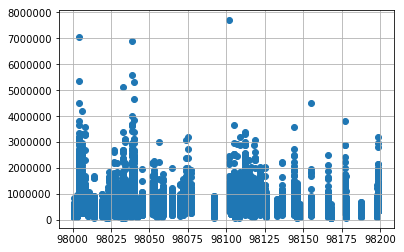

In [20]:
#sales.show(view='BoxWhisker Plot', x='zipcode', y='price')
plt.grid('on')
plt.scatter(sales['zipcode'], sales['price'])
plt.show()

98039 is the most expensive zip code.

# Build a regression model with more features

In [21]:
#my_features_model = (train_data,target='price',features=my_features,validation_set=None)
x_train = train_data[my_features].values.reshape(-1,len(my_features))
y_train = train_data['price'].values.reshape(-1,1)

In [22]:
mult_model = linear_model.LinearRegression()
mult_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Comparing the results of the simple model with adding more features

In [23]:
x_test = test_data[my_features].values.reshape(-1,len(my_features))
y_test = test_data['price'].values.reshape(-1,1)

y_pred = mult_model.predict(x_test)

In [24]:
print('intercept:', mult_model.intercept_, 'coefficients:', mult_model.coef_)
# The mean squared error
print("RMSE: %.2f" % (rmse(y_pred, y_test)))

('intercept:', array([-56348418.94955913]), 'coefficients:', array([[ -6.17445455e+04,   1.88053371e+04,   3.17237961e+02,
         -2.88006880e-01,  -9.68870610e+03,   5.75218487e+02]]))
RMSE: 249311.90


The RMSE goes down from \$254.323,39 to \$228.024,43 with more features.

# Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [25]:
house1 = sales[sales['id']==5309101200]

In [26]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


<img src="house1.png">

In [27]:
print(house1['price'])

1054    620000
Name: price, dtype: int64


In [28]:
print (simple_model.predict(house1['sqft_living']))

ValueError: Expected 2D array, got 1D array instead:
array=[2400].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [29]:
print(mult_model.predict(house1[my_features]))

[[ 630924.33807747]]


In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

## Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [30]:
house2 = sales[sales['id']==1925069082]

In [31]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


<img src="house2.jpg">

In [32]:
print(house2['price'])

1361    2200000
Name: price, dtype: int64


In [33]:
print(simple_model.predict(house2['sqft_living'].values.reshape(-1,1)))

[[ 1263248.45867172]]


In [34]:
print(mult_model.predict(house2[my_features]))

[[ 1270172.16078079]]


In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

## Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [35]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="house_bill.jpg">

In [36]:
print(simple_model.predict(pd.DataFrame(bill_gates)['sqft_living'].values.reshape(-1,1)))

[[ 14067100.74649497]]


The model predicts a price of over $14M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)

In [37]:
print(mult_model.predict(pd.DataFrame(bill_gates)[my_features]))

[[ 15779944.98846922]]


# Answers


# 1 - Selection and summary statistics

In [62]:
house = sales[sales['zipcode']==98039]
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2974,3625049014,20140829T000000,2950000,4,3.50,4860,23885,2.0,0,0,...,12,4860,0,1996,0,98039,47.6172,-122.230,3580,16054
3761,2540700110,20150212T000000,1905000,4,3.50,4210,18564,2.0,0,0,...,11,4210,0,2001,0,98039,47.6206,-122.225,3520,18564
4077,3262300940,20141107T000000,875000,3,1.00,1220,8119,1.0,0,0,...,7,1220,0,1955,0,98039,47.6328,-122.236,1910,8119
4078,3262300940,20150210T000000,940000,3,1.00,1220,8119,1.0,0,0,...,7,1220,0,1955,0,98039,47.6328,-122.236,1910,8119
4149,6447300265,20141014T000000,4000000,4,5.50,7080,16573,2.0,0,0,...,12,5760,1320,2008,0,98039,47.6151,-122.224,3140,15996
4411,2470100110,20140804T000000,5570000,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
4791,2210500019,20150324T000000,937500,3,1.00,1320,8500,1.0,0,0,...,7,1320,0,1954,0,98039,47.6187,-122.226,2790,10800
5178,6447300345,20150406T000000,1160000,4,3.00,2680,15438,2.0,0,2,...,8,2680,0,1902,1956,98039,47.6109,-122.226,4480,14406
5589,6447300225,20141106T000000,1880000,3,2.75,2620,17919,1.0,0,1,...,9,2620,0,1949,0,98039,47.6144,-122.228,3400,14400
5880,2525049148,20141007T000000,3418800,5,5.00,5450,20412,2.0,0,0,...,11,5450,0,2014,0,98039,47.6209,-122.237,3160,17825


In [64]:
house['price'].mean()

2160606.6

# 2 - Filtering data

In [76]:
sqft_range = sales[(sales['sqft_living'] > 2000)& (sales['sqft_living'] < 4000)]

In [78]:
print("The fraction with sqt_living value between 2000 and 4000 is: %.2f" % (sqft_range.shape[0]/sales.shape[0]))

The fraction with sqt_living value between 2000 and 4000 is: 0.42


# 3 - Building a regression model with several more features

In [38]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property
'view', # type of view
'sqft_above', # square feet above ground
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'lat', 'long', # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors 'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [39]:
x_train = train_data[my_features].values.reshape(-1,len(my_features))
y_train = train_data['price'].values.reshape(-1,1)

mult_model = linear_model.LinearRegression()
mult_model.fit(x_train, y_train)

x_test = test_data[my_features].values.reshape(-1,len(my_features))
y_test = test_data['price'].values.reshape(-1,1)

y_pred = mult_model.predict(x_test)

In [42]:
print("RMSE: %.2f" % (rmse(y_pred, y_test)))
features_rmse = rmse(y_pred, y_test)

RMSE: 249311.90


In [43]:
x_train_ad = train_data[advanced_features].values.reshape(-1,len(advanced_features))
y_train_ad = train_data['price'].values.reshape(-1,1)

mult_model_ad = linear_model.LinearRegression()
mult_model_ad.fit(x_train_ad, y_train_ad)

x_test_ad = test_data[advanced_features].values.reshape(-1,len(advanced_features))
y_test_ad = test_data['price'].values.reshape(-1,1)

y_pred_ad = mult_model_ad.predict(x_test_ad)



In [44]:
print("RMSE: %.2f" % (rmse(y_pred_ad, y_test_ad)))
advanced_rmse = rmse(y_pred_ad, y_test_ad)

RMSE: 193727.52


In [45]:
print("The RMSE was lower using the advanced_features object,  the difference between both is %.2f" % (features_rmse - advanced_rmse ))

The RMSE was lower using the advanced_features object,  the difference between both is 55584.38
